### Improvement for Analysis of Center of the Fibril

After reading and thinking on it, maybe the method we should follow, which would better describe the fibril and its strcutrure, is to rather divide the structure by the molecules, coarse-grain the molecules into a single line, and then get the center of the fibril.

Theres still no validity in this as such, it seems as a valid approach, even could be the same result. given that the straigthforward approach would be to do means, and means of means would be the same as doing the whole mean...

It would be the same, so just the representation changes.

In [ ]:
import MDAnalysis as md
import matplotlib.pyplot as plt
import numpy as np

# Upload and go to last frame
u = md.Universe('md_1.tpr', 'md_1_noPBC.xtc')
u.trajectory[-1]

# Select protein atoms
protein = u.select_atoms("protein")

# Check box dimensions - Should be around 16x16x20
xd, yd, zd = u.trajectory[-1].dimensions[0:3]/10

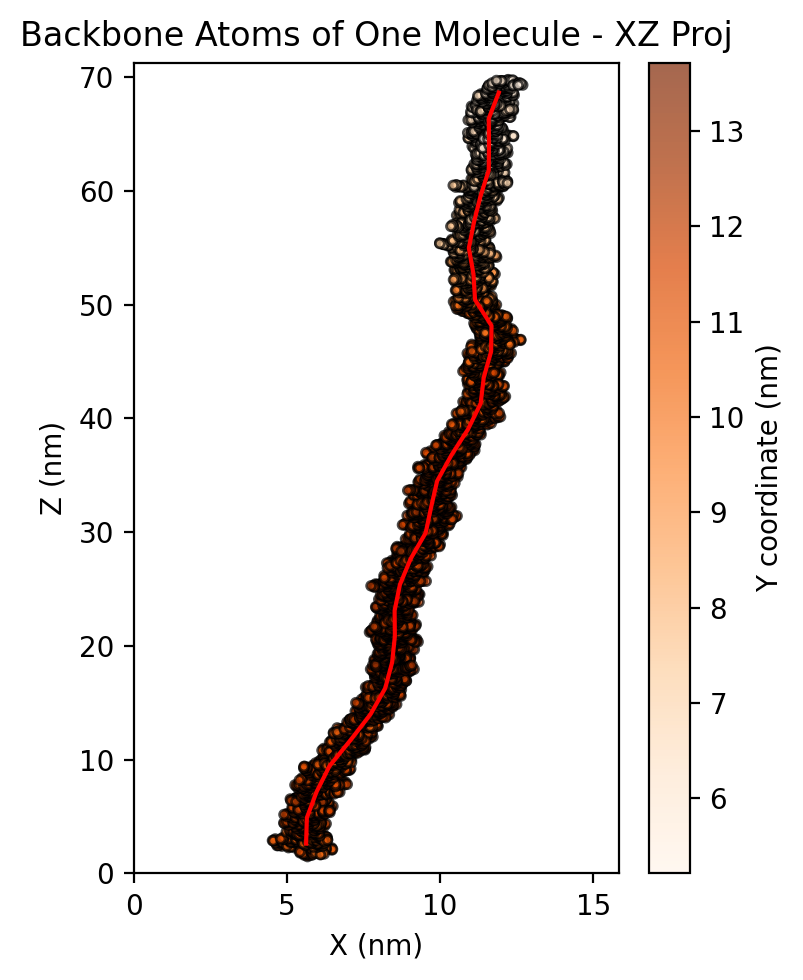

In [12]:
# Representation of the molecule as a 3D Line

# Select Molecule
mol = 6

# Select chains of molecule - listed in 3's 
chains = protein.fragments[3*mol:3*mol + 3]

# Combine atoms
colmol = chains[0] + chains[1] + chains[2]

coords = colmol.positions / 10
x = coords[:, 0]
y = coords[:, 1]
z = coords[:, 2]

# Get the "spine"
# Get zmin and zmax
zmin = min(coords[:, 2])
zmax = max(coords[:, 2])

# Number of discretizations and delta z
# n = int(len(colmol)/20) # We should get in average 4 atoms per level - play with more
n = 30
deltaz = (zmax - zmin)/n

center_z = np.zeros((n, 3)) # Array to store center per z (<x>, <y>, z)

for i in range(n):
    # Get ranges of z
    z_low = deltaz*i + zmin
    z_upp = deltaz + z_low
    z_c = z_low + deltaz/2

    # Group atoms
    mask = (coords[:, 2] >= z_low) & (coords[:, 2] < z_upp)
    selected = coords[mask]

    center_z[i] = [np.mean(selected[:, 0]), np.mean(selected[:, 1]), z_c]

# --- XZ Projection ---
plt.figure(figsize=(4,5), dpi=200)
plt.plot(center_z[:, 0], center_z[:,2], color='red')
sc = plt.scatter(x, z, c=y, cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Y coordinate (nm)')
plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Backbone Atoms of One Molecule - XZ Proj")
plt.xlim(0, xd)
plt.ylim(0, zd)
plt.tight_layout()
plt.show()

Get all this representations

In [4]:
# Get Number of Molecules
num_mol = int((protein.fragindices[-1] + 1)/3)

all_centers = [] 

for mol in range(num_mol):
    # Get atoms
    chains = protein.fragments[3*mol:3*mol + 3]
    colmol = chains[0] + chains[1] + chains[2]

    coords = colmol.positions / 10
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]

    # Get the "spine"
    # Get zmin and zmax
    zmin = min(coords[:, 2])
    zmax = max(coords[:, 2])

    # Number of discretizations and delta z
    # n = int(len(colmol)/20) # We should get in average 4 atoms per level - play with more
    n = 30
    deltaz = (zmax - zmin)/n

    center_z = np.zeros((n, 3)) # Array to store center per z (<x>, <y>, z)

    for i in range(n):
        # Get ranges of z
        z_low = deltaz*i + zmin
        z_upp = deltaz + z_low
        z_c = z_low + deltaz/2

        # Group atoms
        mask = (coords[:, 2] >= z_low) & (coords[:, 2] < z_upp)
        selected = coords[mask]

        center_z[i] = [np.mean(selected[:, 0]), np.mean(selected[:, 1]), z_c]
    
    all_centers.append(center_z)
    

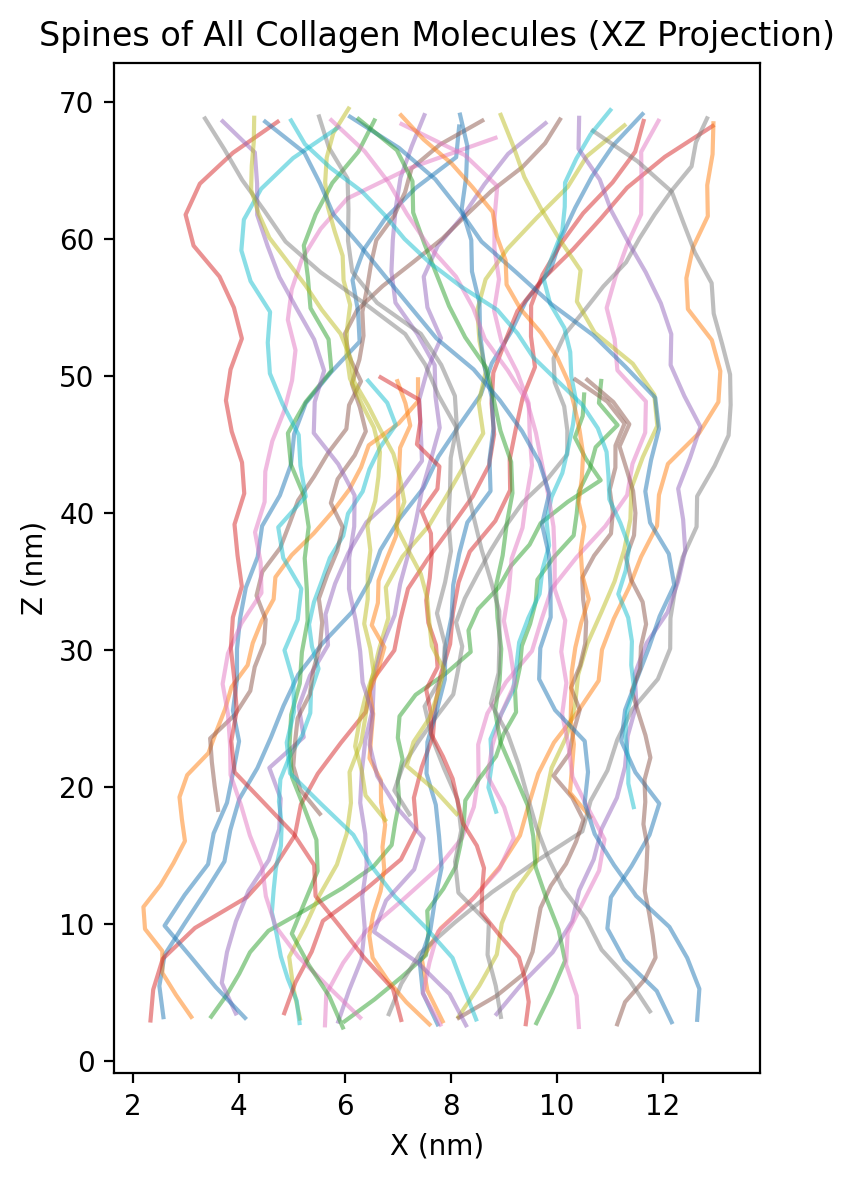

In [15]:
# Graph
plt.figure(figsize=(4, 6), dpi=200)

for center in all_centers:
    x = center[:, 0]
    y = center[:, 1]
    z = center[:, 2]
    # plt.scatter(x, z, c=y, cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
    # plt.plot([x[0],x[-1]], [z[0], z[-1]], alpha=0.5)
    plt.plot(x, z, alpha=0.5)

#plt.colorbar(label='Y coordinate (nm)')
plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Spines of All Collagen Molecules (XZ Projection)")
plt.tight_layout()
plt.show()

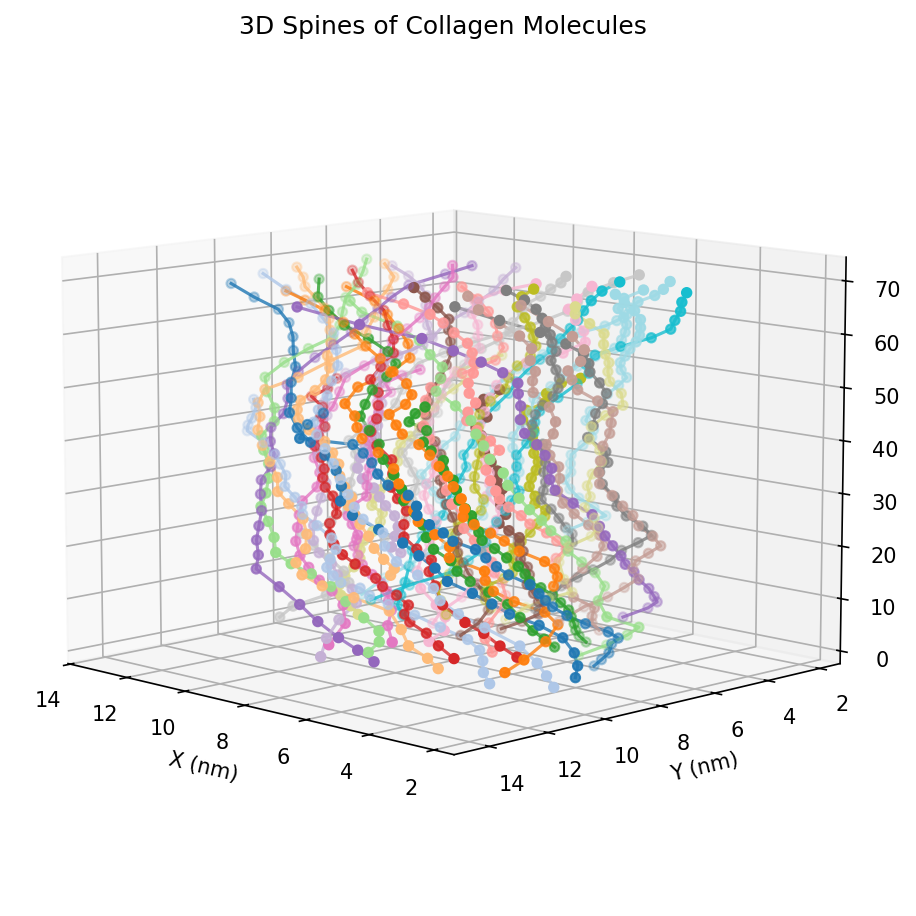

In [6]:
from mpl_toolkits.mplot3d import Axes3D
# Try a 3D graph

# Color Molecules
num_colors = len(all_centers)
colors = plt.cm.tab20(np.linspace(0, 1, num_colors))

# Figura 3D
fig = plt.figure(figsize=(6,8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

for i, center in enumerate(all_centers):
    x = center[:, 0]
    y = center[:, 1]
    z = center[:, 2]
    ax.scatter3D(x,y,z, color=colors[i])
    ax.plot(x, y, z, color=colors[i], linewidth=1.5, alpha=0.8)

ax.set_xlabel("X (nm)")
ax.set_ylabel("Y (nm)")
ax.set_zlabel("Z (nm)")
ax.set_title("3D Spines of Collagen Molecules")
ax.view_init(elev=10, azim=135)

plt.tight_layout()
plt.show()